In [2]:
import pandas as pd
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

data = pd.read_csv(r'E:\Github_Projects_SK\QuoraDuplicateQNA_Classiffier\1. data_gathering\data\train.csv\train.csv')
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
data.shape

(404290, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


## handling missing rows

In [5]:
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
data[data['question1'].isnull() | data['question2'].isnull()]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [7]:
data = data[data['question1'].notnull() & data['question2'].notnull()]

In [8]:
data.shape

(404287, 6)

## handling duplicated rows

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data[['qid1', 'qid2']].duplicated().sum()

np.int64(0)

In [11]:
data[data['qid1'] == data['qid2']]

,id,qid1,qid2,question1,question2,is_duplicate


## checking category balance in target col

In [12]:
data['is_duplicate'].value_counts()

is_duplicate
0    255024
1    149263
Name: count, dtype: int64

In [13]:
(data['is_duplicate'].value_counts()/data['is_duplicate'].count())*100

is_duplicate
0    63.079941
1    36.920059
Name: count, dtype: float64

<Axes: xlabel='is_duplicate'>

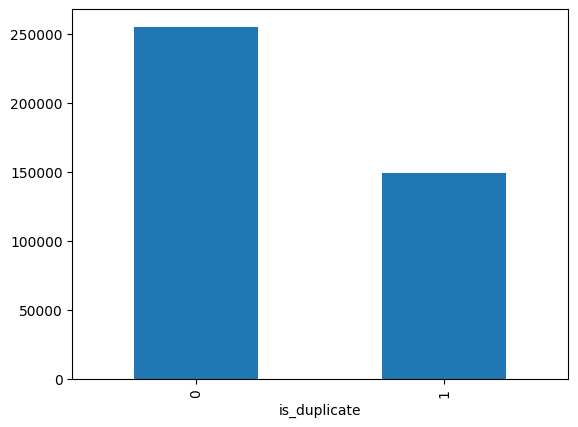

In [14]:
data['is_duplicate'].value_counts().plot(kind='bar')

## Q: analysing qids of the questions, if they are unique with qniue questions or duplicated in cols question1 and question2?

In [15]:
data['qid1'].value_counts()

qid1
8461      50
14110     48
25984     47
20628     47
1749      47
          ..
537924     1
537926     1
537928     1
537930     1
537932     1
Name: count, Length: 290652, dtype: int64

In [16]:
data[data['qid1'] == 8461].sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
114625,114625,8461,6748,How do I improve my English speaking?,How can I improve my communication skill and E...,1
294706,294706,8461,1286,How do I improve my English speaking?,How can I improve my spoken English ability?,1
359622,359622,8461,65637,How do I improve my English speaking?,How can I get fluency in English speaking?,1
312260,312260,8461,2323,How do I improve my English speaking?,How can I improve my spoken English?,1
27111,27111,8461,12214,How do I improve my English speaking?,How can I improve my pronunciation of English ...,1
32544,32544,8461,55435,How do I improve my English speaking?,How can I improve my English in a very short t...,1
381836,381836,8461,2264,How do I improve my English speaking?,How can I improve my english language skills? ...,1
14828,14828,8461,11396,How do I improve my English speaking?,How can I improve my English speaking ability?,1
278461,278461,8461,18355,How do I improve my English speaking?,What are some ways to improve English?,1
112608,112608,8461,7919,How do I improve my English speaking?,How can I learn English well？?,1


In [17]:
data[data['qid2'] == 8461]

,id,qid1,qid2,question1,question2,is_duplicate
374363,374363,9006,8461,How do I improve my pronunciation of English?,How do I improve my English speaking?,1


In [18]:
data[data['question1'] == data['question2']]

,id,qid1,qid2,question1,question2,is_duplicate


In [19]:
# ANS: this mean in cols q1 and q2 no questions pairs are exact same, which infers that all the qids represent unique questions, although sementically they could be duplicate to other unique ided questions.

## my nomeclature:
### `repeated question` means: word by word duplicate ie. syntatically
### `duplicate question` means: meaning of 2 questions is same ie. semantically

## checking dist. of `repeating` unique questions, becoz if a question is repeating 100 times that means, this questions was asked 100 different ways.

In [20]:
all_questions = pd.Series(data['qid1'].tolist() + data['qid2'].tolist())
all_questions

0              1
1              3
2              5
3              7
4              9
           ...  
808569    379845
808570    155606
808571    537929
808572    537931
808573    537933
Length: 808574, dtype: int64

In [21]:
all_questions.nunique()

537929

KeyboardInterrupt: 

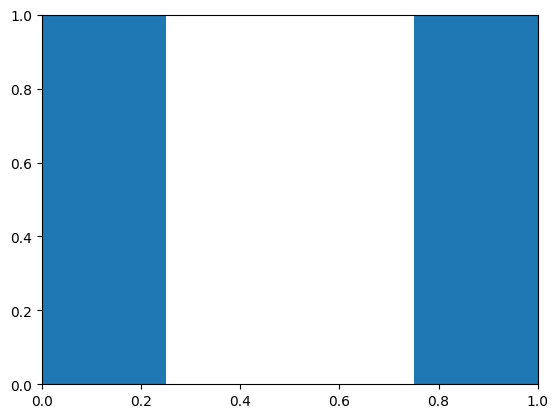

: 

In [22]:
pd.Series(all_questions.value_counts()[all_questions.value_counts()>1]).plot(kind='bar')